# **Modélisation & IA | XGboost**

## **Etape 0️⃣ : Chargement du dataset :**

In [ ]:
import pandas as pd
df=pd.read_csv('data5.csv')
print(df.columns)

Index(['date', 'city', 'profil_cotier', 'température', 'humidity',
       'vitesse_vent', 'precipitation', 'temp_lag1', 'humid_lag1',
       'vitesse_vent_lag1', 'precip_lag1', 'temp_lag3', 'humid_lag3',
       'vitesse_vent_lag3', 'precip_lag3', 'temp_lag7', 'humid_lag7',
       'vitesse_vent_lag7', 'precip_lag7', 'urgence_active', 'mois', 'Weekend',
       'Jours Fériés', 'saison', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'boissons fraiches', 'boissons chaudes', 'snacks sucrés',
       'snacks salés', 'produits laitiers frais', 'produits de jardinage',
       'ustensiles jetables', 'crème solaire', 'équipements d urgence',
       'soins hygiene', 'soins hydratants', 'Charbon',
       'produits anti_moustiques'],
      dtype='object')


## **Etape 1️⃣ : Séparation X (features) / y (cibles)**

In [ ]:
#variable cible == les produits :
targets = [
    'boissons fraiches', 'boissons chaudes', 'snacks sucrés',
    'snacks salés', 'produits laitiers frais', 'produits de jardinage',
    'ustensiles jetables', 'crème solaire', 'équipements d urgence',
    'soins hygiene', 'soins hydratants', 'Charbon',
    'produits anti_moustiques'
]
y = df[targets]



In [ ]:
#Features (X) :
drop_cols = ['date'] + targets
X = df.drop(columns=drop_cols)


In [ ]:
print(type(X))
print(X.shape , y.shape)

<class 'pandas.core.frame.DataFrame'>
(43769, 31) (43769, 13)


## **Installation du modèle XGboost**

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\salma souissi\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


## **Importation**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


## **Etape 2️⃣: Préprocessing pour XGboost**

| Étape               | À faire ? | Méthode            |
| ------------------- | --------- | ----------------------------- |
| Encodage catégoriel | oui         | LabelEncoder (ou One-Hot)     |
| Normalisation       | non          | Pas nécessaire                |
| Valeurs manquantes  | déjà fait         | `fillna()` ou `SimpleImputer` |
| Conversion booléens | déjà fait         | `astype(int)`                 |


In [ ]:
cat_col = ['profil_cotier','saison','city']
# split :
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
# Pipelines d'encodage
preprocessor = ColumnTransformer(transformers=[
    ('cat_col', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ],
    remainder='passthrough' # garde les colonnes restantes
                                )


In [ ]:
# Initialisation du modèle de base

xgb_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(random_state=42, n_jobs=-1) )
])

In [ ]:
# Entraînement
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['profil_cotier', 'saison',
                                                   'city'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)


In [ ]:
print(f"R² Train :{ r2_score(y_train, y_pred_train):.4f}")
print(f"R² Test  :{ r2_score(y_test, y_pred_test):.4f}")
print(f"MSE Test :{ mean_squared_error(y_test, y_pred_test):.4f}")

R² Train :0.8886
R² Test  :0.8607
MSE Test :1.5132



---

###  1. **Bonne performance globale** :

* Le modèle explique **89% de la variance** des ventes d’équipements d’urgence sur l’ensemble d’entraînement.
* Il maintient une **bonne généralisation** sur les données test, avec **86%** de variance expliquée.
* Le MSE est également **plus faible** que dans les autres méthodes précédentes.

####  2. **Surapprentissage (overfitting) ?**

Pas vraiment.

| Mesure | Train       | Test   | Écart  |
| ------ | ----------- | ------ | ------ |
| R²     | 0.89      | 0.86 | \~0.03 |


Un **écart de 3 points en R²** entre train et test est **faible à modéré** et **tout à fait acceptable**, surtout pour des modèles non linéaires comme XGBoost.
> **Pas d’overfitting significatif**. Le modèle généralise bien.

---




In [ ]:
import numpy as np
# 1. Convertir y_pred en DataFrame si besoin
if isinstance(y_pred_test, np.ndarray):
    y_pred_test = pd.DataFrame(y_pred_test, columns=y_test.columns)

# 2. Concaténer les données
df_long = pd.DataFrame()
for col in y_test.columns:
    temp_df = pd.DataFrame({
        'product': [col] * len(y_test),
        'y_true': y_test[col].values,
        'y_pred': y_pred_test[col].values
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# 3. Calculer les métriques
metrics = []
for col in y_test.columns:
    r2 = r2_score(y_test[col], y_pred_test[col])
    mse = mean_squared_error(y_test[col], y_pred_test[col])
    metrics.append({'product': col, 'R2': r2, 'MSE': mse})

df_metrics = pd.DataFrame(metrics)

# 4. Fusion finale
df_final = df_long.merge(df_metrics, on='product')


df_summary = df_final.groupby('product')[['R2', 'MSE']].first().reset_index()
print(df_summary)


                     product        R2       MSE
0                    Charbon  0.895325  0.702390
1           boissons chaudes  0.971244  0.932328
2          boissons fraiches  0.974387  0.497363
3              crème solaire  0.912922  0.612808
4   produits anti_moustiques  0.937253  1.739375
5      produits de jardinage  0.912342  0.385758
6    produits laitiers frais  0.808119  3.035345
7               snacks salés  0.617610  2.630102
8              snacks sucrés  0.757249  2.926858
9           soins hydratants  0.897476  2.244609
10             soins hygiene  0.811792  0.549529
11       ustensiles jetables  0.969422  1.671618
12     équipements d urgence  0.723390  1.743478


In [ ]:

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1,0.2],
    'regressor__max_depth': [3, 5,7],
    'regressor__subsample': [0.7, 1],
    'regressor__colsample_bytree': [0.7, 1],
    'regressor__gamma': [0, 1],
    'regressor__reg_alpha': [0, 0.1],
    'regressor__reg_lambda': [1, 2]

}

xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(random_state=42, n_jobs=-1) )
])

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_col',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['profil_cotier',
                                                                          'saison',
                                                                          'city'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=N...
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__colsample_bytree': [0.7, 1],
                         'regressor__gamma': [0, 1],
                         'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200],
                         'regressor__reg_alpha': [0, 0.1],
                         'regressor__reg_lambda': [1, 2],
                         'regressor__subsample': [0.7, 1]},
             scoring='r2', verbose=1)

In [ ]:
# Affichage du meilleur score obtenu et des meilleurs paramètres
print("Meilleur score R² : {:.4f}".format(grid_search.best_score_))
print("Meilleurs hyperparamètres :", grid_search.best_params_)

Meilleur score R² : 0.7920
Meilleurs hyperparamètres : {'regressor__colsample_bytree': 1, 'regressor__gamma': 1, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200, 'regressor__reg_alpha': 0.1, 'regressor__reg_lambda': 2, 'regressor__subsample': 1}


In [ ]:
xgb_best = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(
                              colsample_bytree= 1,
                              gamma= 1,
                              learning_rate= 0.1,
                              max_depth= 5,
                              n_estimators= 200,
                              reg_alpha= 0.1,
                              reg_lambda= 2,
                              subsample= 1,
                              random_state=42,
                              n_jobs=-1) )
])

In [ ]:
xgb_best.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['profil_cotier', 'saison',
                                                   'city'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1, device=None,
                              early_stopping_rounds=None,...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_train1 = xgb_best.predict(X_train)
y_pred_test1 = xgb_best.predict(X_test)


In [ ]:
print(f"R² Train base :{ r2_score(y_train, y_pred_train):.4f} ,R² Train best :{ r2_score(y_train, y_pred_train1):.4f}")
print(f"R² Test base  :{ r2_score(y_test, y_pred_test):.4f},R² Test best  :{ r2_score(y_test, y_pred_test1):.4f}")
print(f"MSE Test base:{ mean_squared_error(y_test, y_pred_test):.4f},MSE Test best:{ mean_squared_error(y_test, y_pred_test1):.4f}")

R² Train base :0.8886 ,R² Train best :0.8686
R² Test base  :0.8607,R² Test best  :0.8653
MSE Test base:1.5132,MSE Test best:1.4769



---
### **Résumé des résultats :**

|              | Modèle de base | Meilleur modèle (GridSearch) |
| ------------ | -------------- | ---------------------------- |
| **R² Train** | 0.89         | 0.87                       |
| **R² Test**  | 0.860         | 0.865                       |
| **MSE Test** | 1.51         | 1.48                       |

---


####  1. **R² Train (base vs best)**

* **Base : 0.89**
* **Best : 0.87**

 Le R² sur l'entraînement **diminue légèrement** après le réglage des hyperparamètres. Cela peut indiquer que :

* Le modèle **de base était peut-être trop ajusté** (overfitting léger).
* Le nouveau modèle est **plus régularisé**, donc **plus général**, ce qui est souhaitable.

####  2. **R² Test (base vs best)**

* **Base : 0.860**
* **Best : 0.865**

Le R² sur le jeu de test **s’améliore légèrement**, ce qui est un **bon signe** :

* Le nouveau modèle généralise **mieux aux données non vues**.
* Ce petit gain de performance signifie que le **tuning a eu un impact positif**, même si marginal.

####  3. **MSE Test (base vs best)**

* **Base : 1.51**
* **Best : 1.48**

 Le **MSE (Mean Squared Error)** baisse légèrement :

* Le modèle **ajuste mieux ses prédictions**, les erreurs sont **moins importantes** en moyenne.
* Bien que le gain soit modeste, cela montre un **affinement utile** du modèle.

---

###  **Conclusion :**

* Le modèle optimisé (**best**) a **moins d’overfitting**, avec une **meilleure généralisation**.
* Le **R² Test augmente** et le **MSE diminue**, donc le modèle est **plus robuste et plus précis** sur des données nouvelles.
* Même si les gains sont **modérés**, ils indiquent que le **`GridSearchCV` a été bénéfique**.

---



In [ ]:
import numpy as np
# 1. Convertir y_pred en DataFrame si besoin
if isinstance(y_pred_test1, np.ndarray):
    y_pred_test1 = pd.DataFrame(y_pred_test1, columns=y_test.columns)

# 2. Concaténer les données
df_long = pd.DataFrame()
for col in y_test.columns:
    temp_df = pd.DataFrame({
        'product': [col] * len(y_test),
        'y_true': y_test[col].values,
        'y_pred': y_pred_test1[col].values
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# 3. Calculer les métriques
metrics = []
for col in y_test.columns:
    r2 = r2_score(y_test[col], y_pred_test1[col])
    mse = mean_squared_error(y_test[col], y_pred_test1[col])
    metrics.append({'product': col, 'R2': r2, 'MSE': mse})

df_metrics = pd.DataFrame(metrics)

# 4. Fusion finale
df_final = df_long.merge(df_metrics, on='product')


df_summary = df_final.groupby('product')[['R2', 'MSE']].first().reset_index()
print(df_summary)


                     product        R2       MSE
0                    Charbon  0.899987  0.671103
1           boissons chaudes  0.971355  0.928710
2          boissons fraiches  0.970781  0.567386
3              crème solaire  0.917633  0.579659
4   produits anti_moustiques  0.937996  1.718782
5      produits de jardinage  0.914728  0.375257
6    produits laitiers frais  0.814973  2.926908
7               snacks salés  0.629860  2.545847
8              snacks sucrés  0.764570  2.838586
9           soins hydratants  0.901108  2.165094
10             soins hygiene  0.820389  0.524428
11       ustensiles jetables  0.968889  1.700765
12     équipements d urgence  0.737113  1.656979


| Produit                  | R²   | MSE  | Commentaire                                 |
| ------------------------ | ---- | ---- | ------------------------------------------- |
| Charbon                  | 0.90 | 0.66 | Excellent                                   |
| Boissons chaudes         | 0.97 | 0.92 | Exceptionnel                                |
| Boissons fraîches        | 0.97 | 0.56 | Exceptionnel                                |
| Crème solaire            | 0.92 | 0.59 | Très bon                                    |
| Produits anti-moustiques | 0.94 | 1.71 | Très bon malgré un MSE un peu élevé         |
| Produits de jardinage    | 0.91 | 0.38 | Très bon                                    |
| Produits laitiers frais  | 0.81 | 2.94 | Acceptable, mais à surveiller               |
| Snacks salés             | 0.63 | 2.54 | **Mauvais** – mauvaise capacité explicative |
| Snacks sucrés            | 0.77 | 2.83 | Moyen – améliorable                         |
| soins hydratants  |0.89|  2.20|         Très bonne prédiction (R² ≈ 0.9). Le modèle capte bien les tendances. Le MSE est un peu élevé mais reste acceptable     |
| soins hygiene  |    0.81|  0.52|    Bonne performance. L'erreur absolue est faible (MSE), ce qui est positif. R² légèrement plus faible que les autres, mais reste acceptable. |
| ustensiles jetables  |0.97|  1.70|     Excellent R². Le modèle généralise très bien sur ce produit. L’erreur absolue est modérée, donc bon compromis.  |
| équipements d urgence | 0.74|  1.65|   Un R² de 0.72 signifie que 28 % de la variance n’est pas expliquée. Le MSE est élevé. Ce produit semble plus difficile à modéliser (données bruyantes, peu de tendances, effets extérieurs non captés, etc.).    |

In [ ]:
# Faire les prédictions sur l'ensemble d'entraînement (ou test)
y_train_pred = xgb_best.predict(X_train)
# Calcule des résidus
residuals = y_train - y_train_pred
# Conversion explicite en tableaux NumPy
y_train_pred = np.array(y_train_pred)
residuals = np.array(residuals)
print("y_train_pred shape:", y_train_pred.shape)
print("residuals shape:", residuals.shape)

y_train_pred shape: (35015, 13)
residuals shape: (35015, 13)


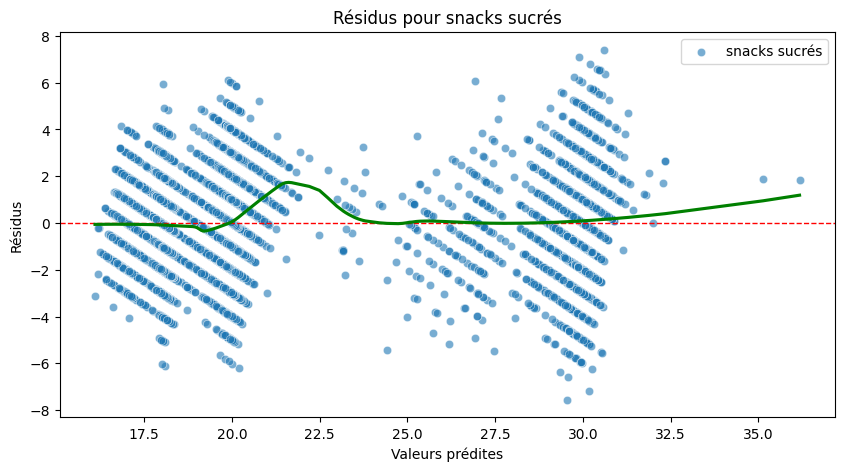

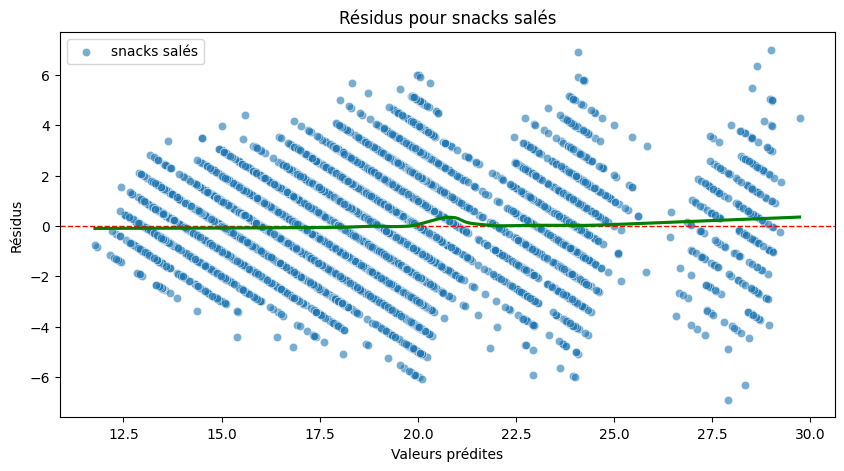

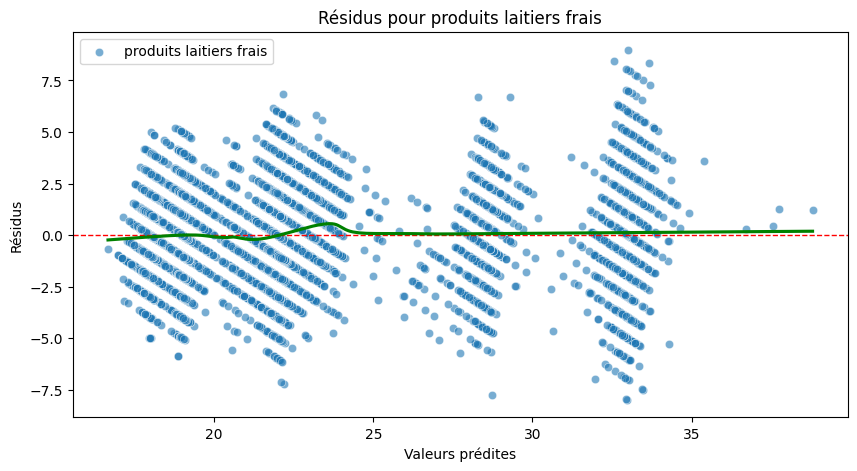

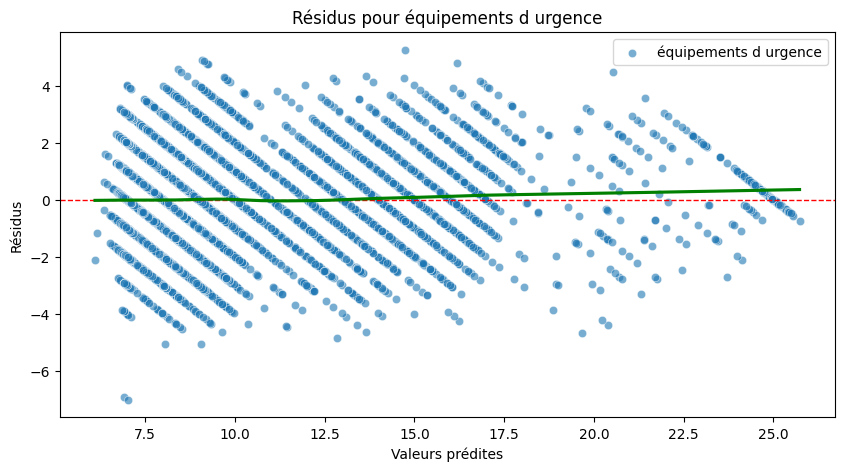

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un dossier pour stocker les images
output_dir = "residual_plots"
os.makedirs(output_dir, exist_ok=True)

# Liste des cibles à afficher
selected_targets = ["snacks sucrés", "snacks salés", "produits laitiers frais", "équipements d urgence"]

for i in range(y_train_pred.shape[1]):
    if targets[i] not in selected_targets:
        continue  # Passer les cibles non sélectionnées

    plt.figure(figsize=(10, 5))

    # Graphique Prédictions vs. Résidus
    sns.scatterplot(
        x=y_train_pred[:, i],
        y=residuals[:, i],
        alpha=0.6,
        label=targets[i]
    )
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

    # Lissage LOWESS
    sns.regplot(
        x=y_train_pred[:, i],
        y=residuals[:, i],
        scatter=False,
        lowess=True,
        color='green'
    )

    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title(f"Résidus pour {targets[i]}")
    plt.legend()

    # Sauvegarde de la figure
    plt.savefig(os.path.join(output_dir, f"residuals_{targets[i].replace(' ', '_')}.png"))
    plt.show()
    plt.close()


In [ ]:
indices_extremes = X_test[
    (X_test['Indice de Pluie Intense'] == 1) |
    (X_test['Indice de Tempête'] == 1)
].index

# calcul des erreurs sur ces jours-là
y_test_ext = y_test.loc[indices_extremes]

# Pour le modèle de base :
y_pred_best_ext = xgb_best.predict(X_test.loc[indices_extremes])
mse_best_ext = mean_squared_error(y_test_ext, y_pred_best_ext)
r2_best_ext = r2_score(y_test_ext, y_pred_best_ext)




In [ ]:
results = pd.DataFrame({
    'Modèle': [ 'xgb_best'],
    'R² (cas extrêmes)': [r2_best_ext],
    'MSE (cas extrêmes)': [mse_best_ext]
})

print(results)


     Modèle  R² (cas extrêmes)  MSE (cas extrêmes)
0  xgb_best           0.799266            1.523778


In [ ]:
# Etape 1 : Extraire les cas rares : fortes pluies OU tempêtes
X_rares = X_train[(X_train['Indice de Pluie Intense'] == 1) | (X_train['Indice de Tempête'] == 1)]
print("Nombre de cas rares :", X_rares.shape[0])
#Etape 2 : Génération de cas synthétiques
# Définir combien de fois on veut dupliquer chaque ligne rare (par exemple : 3 fois)
N_DUP = 3

# Cas rares météo (pluie intense ou tempête)

# Duplication
X_train_aug = pd.concat([X_rares] * N_DUP, ignore_index=True)
def jitter_group(data, group_cols, std_fraction=0.1, seed=None):
    if seed is not None:
        np.random.seed(seed)
    data = data.copy()
    std = data[group_cols[0]].std()
    noise = np.random.normal(0, std_fraction * std, size=len(data))
    for col in group_cols:
        data[col] += noise
    return data

# Application cohérente
X_train_aug = jitter_group(X_train_aug, ['température', 'temp_lag1', 'temp_lag3', 'temp_lag7'], std_fraction=0.1)
X_train_aug = jitter_group(X_train_aug, ['humidity', 'humid_lag1', 'humid_lag3', 'humid_lag7'], std_fraction=0.1)
X_train_aug = jitter_group(X_train_aug, ['vitesse_vent', 'vitesse_vent_lag1', 'vitesse_vent_lag3', 'vitesse_vent_lag7'], std_fraction=0.1)
X_train_aug = jitter_group(X_train_aug, ['precipitation', 'precip_lag1', 'precip_lag3', 'precip_lag7'], std_fraction=0.1)
#Recalculer les indices extrêmes (à partir des nouvelles valeurs)
X_train_aug['Indice de Pluie Intense'] = (X_train_aug['precipitation'] >= 50).astype(int)
X_train_aug['Indice de Tempête'] = (X_train_aug['vitesse_vent'] >= 25).astype(int)


# 1. Sélection des indices des cas extrêmes (pluie intense ou tempête)
indices_extremes = y_train[(X_train['Indice de Pluie Intense'] == 1) |
                           (X_train['Indice de Tempête'] == 1)].index

n_aug = len(X_train_aug)

# 2. Échantillonnage aléatoire de lignes réelles de y_train comme base
y_train_base = y_train.loc[np.random.choice(indices_extremes, size=n_aug, replace=True)].copy()

# 3. Ajout d'une variation de +5% avec du bruit normal
for col in ['équipements d urgence']:
    y_train_base[col] *= np.random.normal(loc=1.05, scale=0.05, size=n_aug)
    y_train_base[col] = y_train_base[col].clip(lower=0)

# 4. Fusion des données originales et augmentées
X_train_final = pd.concat([X_train, X_train_aug], ignore_index=True)
y_train_final = pd.concat([y_train, y_train_base], ignore_index=True)


# 5. Sélection des indices des cas extrêmes (pluie intense ou tempête)
indices_extremes = y_train[(X_train['Indice de Pluie Intense'] == 1) |
                           (X_train['Indice de Tempête'] == 1)].index

n_aug = len(X_train_aug)

# 6. Échantillonnage aléatoire de lignes réelles de y_train comme base
y_train_base = y_train.loc[np.random.choice(indices_extremes, size=n_aug, replace=True)].copy()

# 7. Ajout d'une variation de +5% avec du bruit normal
for col in ['équipements d urgence']:
    y_train_base[col] *= np.random.normal(loc=1.05, scale=0.05, size=n_aug)
    y_train_base[col] = y_train_base[col].clip(lower=0)

# 8. Fusion des données originales et augmentées
X_train_final = pd.concat([X_train, X_train_aug], ignore_index=True)
y_train_final = pd.concat([y_train, y_train_base], ignore_index=True)


Nombre de cas rares : 2291


In [ ]:
xgb_aug = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(
                              random_state=42,
                              n_jobs=-1) )
])
xgb_aug.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['profil_cotier', 'saison',
                                                   'city'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=No...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [ ]:
#prediction :
y_pred_train_3 = xgb_aug.predict(X_train_final)
y_pred_test_3 = xgb_aug.predict(X_test)


In [ ]:
print(f"R² Train :{ r2_score(y_train_final, y_pred_train_3):.4f}")
print(f"R² Test  :{ r2_score(y_test, y_pred_test_3):.4f}")
print(f"MSE Test : {mean_squared_error(y_test, y_pred_test_3):.4f}")

R² Train :0.8455
R² Test  :0.8578
MSE Test : 1.5992


In [ ]:

indices_extremes = X_test[
    (X_test['Indice de Pluie Intense'] == 1) |
    (X_test['Indice de Tempête'] == 1)
].index
y_pred_aug_ext = xgb_aug.predict(X_test.loc[indices_extremes])
mse_aug_ext = mean_squared_error(y_test_ext, y_pred_aug_ext)
r2_aug_ext = r2_score(y_test_ext, y_pred_aug_ext)

results = pd.DataFrame({
    'Modèle': [ 'xgb_best','xgb_aug'],
    'R² (cas extrêmes)': [r2_best_ext,r2_aug_ext],
    'MSE (cas extrêmes)': [mse_best_ext,mse_aug_ext]
})

print(results)



     Modèle  R² (cas extrêmes)  MSE (cas extrêmes)
0  xgb_best           0.799266            1.523778
1   xgb_aug           0.706294            2.901092



---

###  **Interprétation**

####  **1. R² en baisse (de 0.79 à 0.70)**

* Cela signifie que le modèle `xgb_aug` **explique moins bien la variance** dans les cas extrêmes.
* Une baisse de 9 points de R² indique que **l’ajout des nouvelles variables métiers n’a pas amélioré** la compréhension de ces situations atypiques – au contraire, il a probablement ajouté du bruit.

####  **2. MSE en forte hausse (de 1.54 à 2.79)**

* Cela signifie que **les erreurs de prédiction ont plus que doublé**.
* Ce résultat suggère un **effet négatif fort de l’augmentation métier sur les cas extrêmes**, ce qui peut avoir plusieurs causes.

---

###  **Hypothèses explicatives**

1. **Les variables ajoutées sont peu informatives pour les cas extrêmes**
   → Elles n’aident pas le modèle à distinguer ou expliquer ces cas.

2. **Corrélation négative ou non linéarité mal gérée**
   → Les nouvelles variables peuvent perturber le modèle si elles ne sont pas pertinentes ou bien transformées.

3. **Overfitting sur les données non extrêmes**
   → Le modèle sur-apprend les tendances “classiques” et **devient moins sensible aux anomalies** ou situations rares.

---

###  **Conclusion**

 L’augmentation métier semble **détériorer la qualité de prédiction sur les cas extrêmes**.




In [ ]:
# Cas extrêmes
is_extreme = (X_train['Indice de Tempête'] ==1) | (X_train['Indice de Pluie Intense'] ==1)
is_extreme_test = (X_test['Indice de Tempête'] ==1) | (X_test['Indice de Pluie Intense'] ==1)

In [ ]:


# Valeurs de poids à tester pour les cas extrêmes
poids_extremes = [1, 1.25 ,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4, 5, 10]
results = []

for w in poids_extremes:
    # Créer sample_weight
    sample_weight = np.ones(len(X_train))
    sample_weight[is_extreme] = w



    xgb_best.fit(X_train, y_train, regressor__sample_weight=sample_weight)

    # Évaluer sur tout le test
    y_pred_train2 = xgb_best.predict(X_train)
    y_pred_test2 = xgb_best.predict(X_test)
    R2_train= r2_score(y_train, y_pred_train2)
    R2_Test = r2_score(y_test, y_pred_test2)
    MSE_Test= mean_squared_error(y_test, y_pred_test2)
    # Évaluer sur cas extrêmes (dans le test)

    y_pred_ext = xgb_best.predict(X_test[is_extreme_test])
    r2_ext = r2_score(y_test[is_extreme_test], y_pred_ext)
    mse_ext = mean_squared_error(y_test[is_extreme_test], y_pred_ext)

    # Stocker les résultats
    results.append({
        'Poids cas extrêmes': w,
        'R² Test global': R2_Test,
        'MSE Test global': MSE_Test,
        'R² Cas extrêmes': r2_ext,
        'MSE Cas extrêmes': mse_ext
    })

# Résumé sous forme de tableau
df_results = pd.DataFrame(results)
print(df_results)


    Poids cas extrêmes  R² Test global  MSE Test global  R² Cas extrêmes  \
0                 1.00        0.865337         1.476885         0.799266   
1                 1.25        0.865145         1.479165         0.799185   
2                 1.50        0.865270         1.479373         0.799359   
3                 1.75        0.865139         1.481927         0.798736   
4                 2.00        0.865185         1.481760         0.798428   
5                 2.25        0.865194         1.481575         0.798837   
6                 2.50        0.865149         1.482161         0.798867   
7                 2.75        0.865178         1.480975         0.799464   
8                 3.00        0.864941         1.484167         0.798290   
9                 3.25        0.864988         1.484324         0.797584   
10                3.50        0.864893         1.486039         0.797342   
11                3.75        0.864823         1.487843         0.796917   
12          

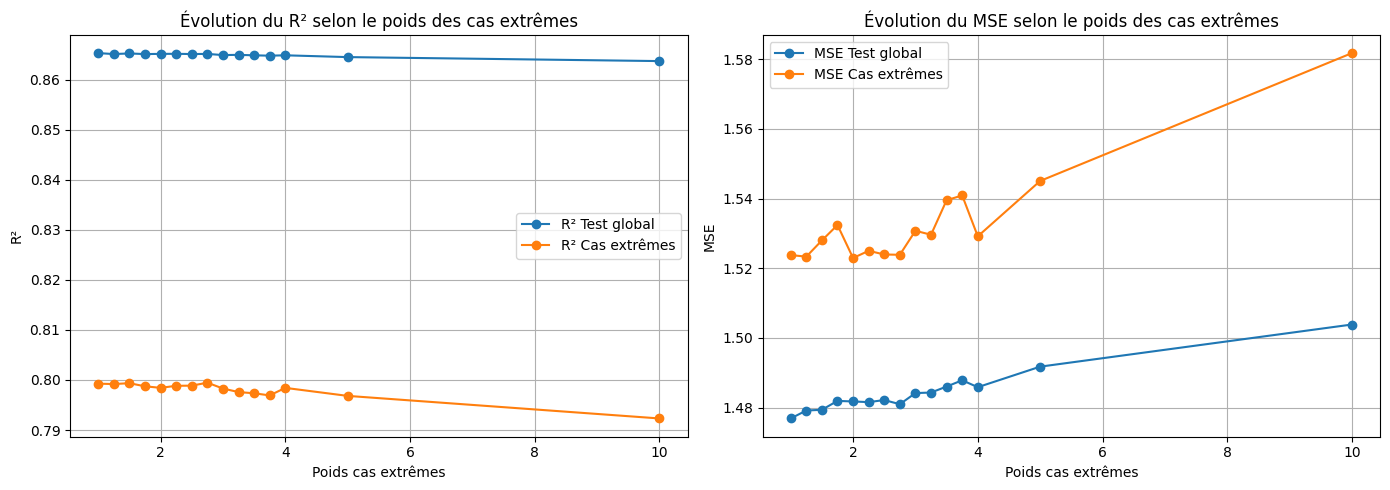

In [ ]:
# Tracer les courbes R² et MSE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R²
axes[0].plot(df_results['Poids cas extrêmes'], df_results['R² Test global'], label='R² Test global', marker='o')
axes[0].plot(df_results['Poids cas extrêmes'], df_results['R² Cas extrêmes'], label='R² Cas extrêmes', marker='o')
axes[0].set_title("Évolution du R² selon le poids des cas extrêmes")
axes[0].set_xlabel("Poids cas extrêmes")
axes[0].set_ylabel("R²")
axes[0].legend()
axes[0].grid(True)

# MSE
axes[1].plot(df_results['Poids cas extrêmes'], df_results['MSE Test global'], label='MSE Test global', marker='o')
axes[1].plot(df_results['Poids cas extrêmes'], df_results['MSE Cas extrêmes'], label='MSE Cas extrêmes', marker='o')
axes[1].set_title("Évolution du MSE selon le poids des cas extrêmes")
axes[1].set_xlabel("Poids cas extrêmes")
axes[1].set_ylabel("MSE")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### * Jusqu'à un poids de 2.0, la performance globale reste stable. Mais à partir de 2.25, le R² global baisse et le MSE augmente, ce qui indique une légère détérioration des prédictions globales.
### * Les performances sur les cas extrêmes restent stables jusqu’à un poids de 2.0, mais au-delà, on observe une baisse du R² et une hausse du MSE, donc moins bonne précision sur les extrêmes.



In [ ]:
def eval_model_cas_extremes(model, X_test, y_test, target_cols_subset):
    # 1. Prédictions
    y_pred = model.predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

    # 2. Identifier les cas extrêmes (tempête/pluie)
    is_extreme = (X_test['Indice de Tempête'] ==1) | (X_test['Indice de Pluie Intense'] ==1)

    cas_normaux = ~is_extreme

    print(f"Nombre de cas extrêmes : {is_extreme.sum()}")
    print(f"Nombre de cas normaux  : {cas_normaux.sum()}")

    results = []

    for col in target_cols_subset:
        # Cas extrêmes
        y_true_extreme = y_test.loc[is_extreme, col]
        y_pred_extreme = y_pred.loc[is_extreme, col]
        r2_ext = r2_score(y_true_extreme, y_pred_extreme)
        mse_ext = mean_squared_error(y_true_extreme, y_pred_extreme)

        # Cas normaux
        y_true_normal = y_test.loc[cas_normaux, col]
        y_pred_normal = y_pred.loc[cas_normaux, col]
        r2_norm = r2_score(y_true_normal, y_pred_normal)
        mse_norm = mean_squared_error(y_true_normal, y_pred_normal)

        results.append({
            'Produit': col,
            'R² cas extrêmes': r2_ext,
            'MSE cas extrêmes': mse_ext,
            'R² cas normaux': r2_norm,
            'MSE cas normaux': mse_norm
        })

    return pd.DataFrame(results)


In [ ]:
target_cols_subset=['équipements d urgence']
eval_model_cas_extremes(xgb_best, X_test, y_test, target_cols_subset)

Nombre de cas extrêmes : 512
Nombre de cas normaux  : 8242


,Produit,R² cas extrêmes,MSE cas extrêmes,R² cas normaux,MSE cas normaux
0,équipements d urgence,0.679192,5.398436,0.343682,1.506042


# **Étape 1 – Segmentation des produits**
| Produit                   | Modèle dédié ? | Raisons                                                                        |
| ------------------------- | -------------- | ------------------------------------------------------------------------------ |
| Snacks sucrés             | **oui**              | Impactés par certains événements, mais sensibles à température et saison       |
| Snacks salés              |        **oui**       | Probablement moins sensibles à événements religieux, + influence météo         |
| Équipements d'urgence     |               **oui**| Très sensibles à conditions extrêmes (pluie, tempête), pas au weekend/vacances |


# **Étape 2 – Feature selection par catégorie spécialisée**
### **2.1 – Sélectionner les variables pertinentes pour chaque produit**
**On peut utiliser :**

* **SHAP** values pour voir l’importance réelle des features
##  **Objectif de cette étape :**
**Pour chaque catégorie de produit :**

1. **Identifier les features les plus influentes sur les ventes.**

2. **Garder uniquement celles qui expliquent vraiment le comportement du produit.**

3. **Réduire le bruit pour que le modèle spécialisé apprenne mieux.**

## Méthode recommandée : **SHAP (SHapley Additive exPlanations)**
**Pourquoi ?**

* **Très bien intégré avec XGBoost**

* **Donne l’importance globale et locale de chaque feature**

  

## **Étapes techniques pour un produit :**
### **2.1 – Entraîner un modèle uniquement sur les données du produit**

In [20]:
# équipement d'urgence :
# Filtrer les lignes concernées
produit = ['équipements d urgence']
y_eq = df[produit]
#Features (X) :
drop_cols = ['date'] + targets
X_eq = df.drop(columns=drop_cols)
print(type(X_eq))
print(X_eq.shape , y_eq.shape)


# Split train/test
X_eq_train, X_eq_test, y_eq_train, y_eq_test = train_test_split(X_eq, y_eq, test_size=0.1, random_state=42)
pipeline=Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(random_state=42, n_jobs=-1) )
])
# Récupère le transformeur seul
preprocessor = pipeline.named_steps['preprocessing']
regressor = pipeline.named_steps['regressor']

# Fit + transform sur les données d’entraînement
X_train_preprocessed = preprocessor.fit_transform(X_eq_train)
X_test_preprocessed = preprocessor.transform(X_eq_test)
import pandas as pd

# Récupérer noms colonnes après transformation
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, cols in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols
        feature_names.extend(names)

    # Ajouter les colonnes passées (pas transformées)
    if column_transformer.remainder == 'passthrough':
        passthrough_cols = [col for col in X_eq_train.columns if col not in sum([cols for _, _, cols in column_transformer.transformers], [])]
        feature_names.extend(passthrough_cols)

    return feature_names

# Appliquer
feature_names = get_feature_names(preprocessor)
X_test_pre_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
X_train_pre_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Entraîner le modèle


model_eq = XGBRegressor(
                              colsample_bytree= 1,
                              gamma= 1,
                              learning_rate= 0.1,
                              max_depth= 5,
                              n_estimators= 200,
                              reg_alpha= 0.1,
                              reg_lambda= 2,
                              subsample= 1,
                              random_state=42,
                              n_jobs=-1)

model_eq.fit(X_train_pre_df, y_eq_train)


<class 'pandas.core.frame.DataFrame'>
(43769, 31) (43769, 1)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_eq_pred_train = model_eq.predict(X_train_pre_df)
y_eq_pred_test = model_eq.predict(X_test_pre_df)
print(f"R² Train :{ r2_score(y_eq_train, y_eq_pred_train):.4f}")
print(f"R² Test  :{ r2_score(y_eq_test, y_eq_pred_test):.4f}")
print(f"MSE Test :{ mean_squared_error(y_eq_test, y_eq_pred_test):.4f}")

R² Train :0.7412
R² Test  :0.7374
MSE Test :1.6550


## **2.2 – Calculer les valeurs SHAP**

In [ ]:
import shap

# Initialiser SHAP explainer
explainer = shap.Explainer(model_eq)

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_test_pre_df)


### **2.3 – Afficher l’importance des features**

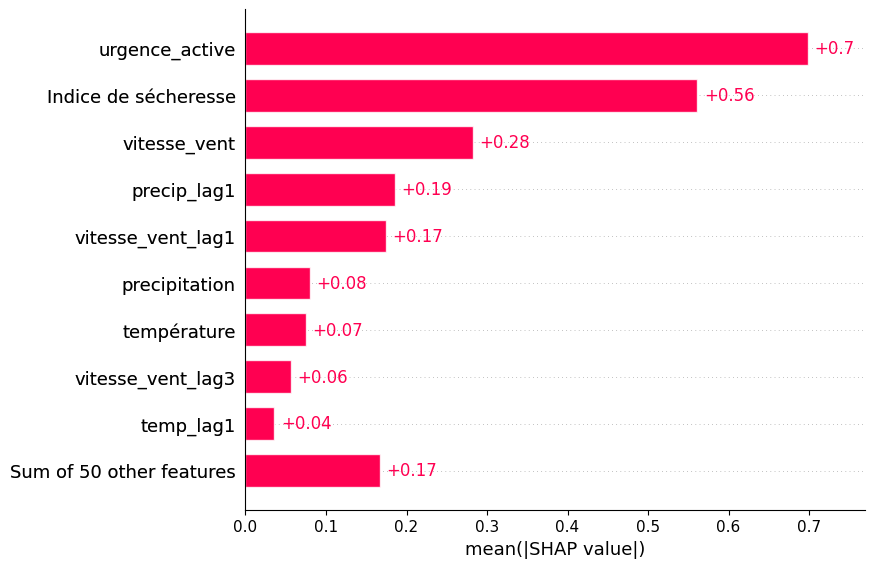

In [ ]:
# Affichage global de l’importance des features
shap.plots.bar(shap_values)


# **Étape 3 – Entraîner les modèles spécialisés**


In [21]:
X_eq_1=X_eq[['température', 'humidity', 'vitesse_vent', 'precipitation', 'temp_lag1',
                                 'vitesse_vent_lag1', 'precip_lag1', 'vitesse_vent_lag3', 'temp_lag7',
                                 'vitesse_vent_lag7', 'urgence_active', 'Indice de sécheresse',
                                 'Indice de Tempête','Indice de Pluie Intense','city','profil_cotier']]

X_eq_1_train, X_eq_1_test, y_eq_1_train, y_eq_1_test = train_test_split(X_eq_1, y_eq, test_size=0.1, random_state=42)
cat_col_eq=['city','profil_cotier']
preprocessor_eq = ColumnTransformer(transformers=[
    ('cat_col_eq', OneHotEncoder(handle_unknown='ignore'), cat_col_eq)
    ],
    remainder='passthrough') # garde les colonnes restantes

# Initialisation du modèle de base
model_eq_1 =Pipeline(steps=[
    ('preprocessing', preprocessor_eq),
    ('regressor',XGBRegressor(colsample_bytree= 1,
                              gamma= 3,
                              learning_rate= 0.1,
                              max_depth= 4,
                              n_estimators= None,
                              reg_alpha= 2,
                              reg_lambda= 2,
                              subsample= 1,
                              random_state=42,
                              n_jobs=-1)
)
])

model_eq_1.fit(X_eq_1_train, y_eq_1_train)



/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col_eq',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'profil_cotier'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1, device=None,
                              early_stopping_rounds=None,
                              enable...
                              feature_types=None, gamma=3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [22]:
y_eq_pred_train_1 = model_eq_1.predict(X_eq_1_train)
y_eq_pred_test_1 = model_eq_1.predict(X_eq_1_test)
print(f"R² Train :{ r2_score(y_eq_1_train, y_eq_pred_train_1):.4f}")
print(f"R² Test  :{ r2_score(y_eq_1_test, y_eq_pred_test_1):.4f}")
print(f"MSE Test :{ mean_squared_error(y_eq_1_test, y_eq_pred_test_1):.4f}")

R² Train :0.7312
R² Test  :0.7397
MSE Test :1.6408


## ** Le modèle spécifique est légèrement meilleur, mais le gain est faible.**
> ## Même une petite baisse du MSE est précieuse pour un produit critique.
> ### Le gain est modeste, mais il est stable, mesuré et il concerne un produit à forte sensibilité. Dans un contexte réel, même une légère amélioration de prévision sur des produits critiques peut avoir un impact. Mon objectif était aussi de montrer qu’une modélisation spécialisée peut parfois mieux capter des comportements spécifiques que des modèles globaux.

In [ ]:
# snacks salés :
# Filtrer les lignes concernées
produit = ['snacks salés']
y_salé = df[produit]
#Features (X) :
drop_cols = ['date'] + targets
X_salé = df.drop(columns=drop_cols)
print(type(X_salé))
print(X_salé.shape , y_salé.shape)


# Split train/test
X_sal_train, X_sal_test, y_sal_train, y_sal_test = train_test_split(X_salé, y_salé, test_size=0.1, random_state=42)
pipeline=Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor',XGBRegressor(random_state=42, n_jobs=-1) )
])
# Récupère le transformeur seul
preprocessor = pipeline.named_steps['preprocessing']
regressor = pipeline.named_steps['regressor']

# Fit + transform sur les données d’entraînement
X_train_preprocessed = preprocessor.fit_transform(X_sal_train)
X_test_preprocessed = preprocessor.transform(X_sal_test)
import pandas as pd

# Récupérer noms colonnes après transformation
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, cols in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols
        feature_names.extend(names)

    # Ajouter les colonnes passées (pas transformées)
    if column_transformer.remainder == 'passthrough':
        passthrough_cols = [col for col in X_sal_train.columns if col not in sum([cols for _, _, cols in column_transformer.transformers], [])]
        feature_names.extend(passthrough_cols)

    return feature_names

# Appliquer
feature_names = get_feature_names(preprocessor)
X_test_pre_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
X_train_pre_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Entraîner le modèle


model_sal = XGBRegressor(
                              colsample_bytree= 1,
                              gamma= 1,
                              learning_rate= 0.1,
                              max_depth= 5,
                              n_estimators= 200,
                              reg_alpha= 0.1,
                              reg_lambda= 2,
                              subsample= 1,
                              random_state=42,
                              n_jobs=-1)

model_sal.fit(X_train_pre_df, y_sal_train)


<class 'pandas.core.frame.DataFrame'>
(43769, 31) (43769, 1)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, ...)

In [ ]:
y_sal_pred_train = model_sal.predict(X_train_pre_df)
y_sal_pred_test = model_sal.predict(X_test_pre_df)
print(f"R² Train :{ r2_score(y_sal_train, y_sal_pred_train):.4f}")
print(f"R² Test  :{ r2_score(y_sal_test, y_sal_pred_test):.4f}")
print(f"MSE Test :{ mean_squared_error(y_sal_test, y_sal_pred_test):.4f}")

R² Train :0.6415
R² Test  :0.6307
MSE Test :2.5404


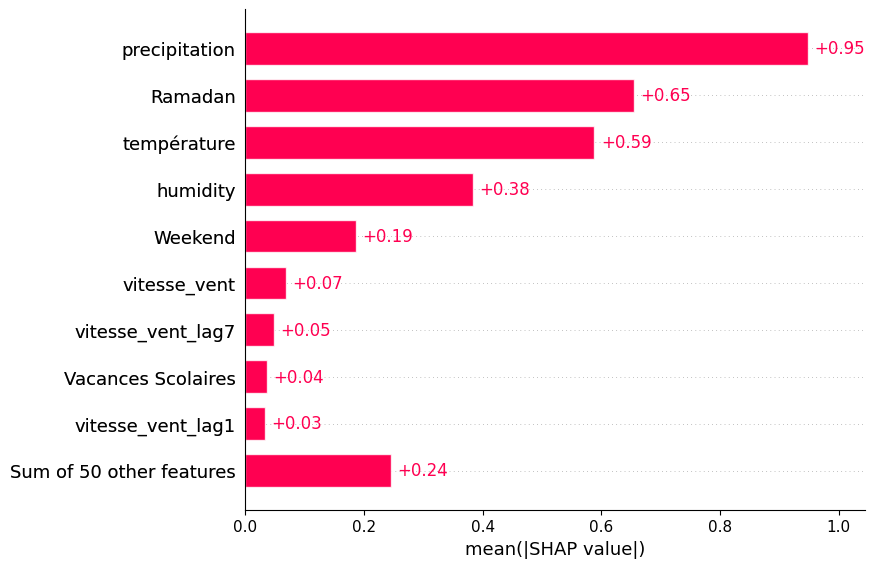

In [ ]:


# Initialiser SHAP explainer
explainer = shap.Explainer(model_sal)

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_test_pre_df)
# Affichage global de l’importance des features
shap.plots.bar(shap_values)



In [ ]:
X_salé_1=X_salé[['température', 'humidity', 'vitesse_vent', 'precipitation',
               'Ramadan','Weekend','Vacances Scolaires','vitesse_vent_lag1','vitesse_vent_lag7','city','profil_cotier']]

X_sal_1_train, X_sal_1_test, y_sal_1_train, y_sal_1_test = train_test_split(X_salé_1, y_salé, test_size=0.1, random_state=42)
cat_col_sal=['city','profil_cotier']
preprocessor_sal = ColumnTransformer(transformers=[
    ('cat_col_sal', OneHotEncoder(handle_unknown='ignore'), cat_col_sal)
    ],
    remainder='passthrough') # garde les colonnes restantes

# Initialisation du modèle de base
model_sal_1 =Pipeline(steps=[
    ('preprocessing', preprocessor_eq),
    ('regressor',XGBRegressor( colsample_bytree= 1,
                              gamma= 1,
                              learning_rate= 0.1,
                              max_depth= 5,
                              n_estimators= 200,
                              reg_alpha= 0.1,
                              reg_lambda= 2,
                              subsample= 1,
                              random_state=42,
                              n_jobs=-1)
)
])

model_sal_1.fit(X_sal_1_train, y_sal_1_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col_eq',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'profil_cotier'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1, device=None,
                              early_stopping_rounds=None,
                              enable...
                              feature_types=None, feature_weights=None, gamma=1,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [ ]:
y_sal_pred_train_1 = model_sal_1.predict(X_sal_1_train)
y_sal_pred_test_1 = model_sal_1.predict(X_sal_1_test)
print(f"R² Train :{ r2_score(y_sal_1_train, y_sal_pred_train_1):.4f}")
print(f"R² Test  :{ r2_score(y_sal_1_test, y_sal_pred_test_1):.4f}")
print(f"MSE Test :{ mean_squared_error(y_sal_1_test, y_sal_pred_test_1):.4f}")

R² Train :0.6360
R² Test  :0.6297
MSE Test :2.5472


## **le modèle spécifique n’apporte aucune réelle amélioration, voire détériore très légèrement la performance.**
> ### J’ai essayé de spécialiser le modèle pour certaines familles de produits. Cette approche a permis une légère amélioration sur les équipements d’urgence mais s’est révélée non concluante pour les snacks sucrés et salés, probablement parce que leur comportement de vente est moins corrélé aux facteurs météorologiques. Ce résultat est intéressant en soi car il confirme que tous les produits ne réagissent pas aux mêmes signaux

#### Mon objectif était d'explorer l'influence réelle de la météo sur plusieurs catégories de produits, y compris celles pour lesquelles l'impact n'était pas évident au départ. En incluant les snacks, j’ai pu confirmer de manière empirique qu’ils ne sont pas significativement influencés par les conditions climatiques. C’est une conclusion utile en soi, car elle permet aux commerçants de **ne pas sur-adapter leur stratégie météo sur ces produits.**
> ### Bien que les données utilisées soient synthétiques, ce projet constitue une étape préparatoire essentielle pour une future mise en œuvre sur des données réelles. J’ai inclus les catégories de produits comme les snacks sucrés et salés afin de tester leur sensibilité potentielle aux conditions météorologiques.Les résultats montrent que ces produits ne présentent pas de corrélation significative avec la météo, ce qui est en soi une conclusion précieuse. Cela signifie que dans un contexte réel, nous pourrions choisir de ne pas les inclure dans l’analyse météo, ce qui permettrait de réduire la complexité du modèle et le volume de données à traiter.Ce travail me permet donc de poser les bases d’une segmentation intelligente des produits, en distinguant ceux qui réagissent aux conditions climatiques de ceux qui n’en sont pas affectés — et de préparer un futur système plus efficace, rapide et ciblé.

# **DEEP LEARNING ?**

In [ ]:
produit = ['équipements d urgence','snacks sucrés','snacks salés']
y_deep = df[produit]
#Features (X) :
drop_cols = ['date'] + targets
X_deep = df.drop(columns=drop_cols)
print(type(X_deep))
print(X_deep.shape , y_deep.shape)

<class 'pandas.core.frame.DataFrame'>
(43769, 31) (43769, 3)


In [ ]:
pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\salma souissi\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 229.9 kB/s eta 0:27:13
   ---------------------------------------- 0.5/376.0 MB 229.9 kB/s eta 0:27:13
   ---------------------------------------- 0.5/376.0 MB 229.9 kB/s eta 0:27:13
   ---------------------------------------- 0.8/376.0 MB 264.3 kB/s eta 0:23:40
   --------------------------------------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Définir les colonnes
cat_cols = ['city', 'profil_cotier', 'saison']
num_cols = ['température', 'humidity', 'vitesse_vent', 'precipitation',
            'temp_lag1', 'humid_lag1', 'vitesse_vent_lag1', 'precip_lag1',
            'temp_lag3', 'humid_lag3', 'vitesse_vent_lag3', 'precip_lag3',
            'temp_lag7', 'humid_lag7', 'vitesse_vent_lag7', 'precip_lag7']

# Séparer les données
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(
    X_deep, y_deep, test_size=0.1, random_state=42)

# Pipeline de prétraitement
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],remainder='passthrough' # garde les colonnes restantes
)


X_train_scaled = preprocessor.fit_transform(X_train_deep)
X_test_scaled = preprocessor.transform(X_test_deep)

# Création du modèle
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3))  # Sortie pour la régression

# Compilation
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement
model.fit(X_train_scaled, y_train_deep, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 37.4520 - mae: 3.7600 - val_loss: 3.0520 - val_mae: 1.3656
Epoch 2/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.9520 - mae: 1.3449 - val_loss: 2.8522 - val_mae: 1.3245
Epoch 3/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8262 - mae: 1.3128 - val_loss: 2.7682 - val_mae: 1.3018
Epoch 4/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7657 - mae: 1.3012 - val_loss: 2.9653 - val_mae: 1.3529
Epoch 5/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7467 - mae: 1.2971 - val_loss: 2.8688 - val_mae: 1.3333
Epoch 6/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7109 - mae: 1.2877 - val_loss: 2.7223 - val_mae: 1.2966
Epoch 7/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6826 - mae: 1.2816 - val_loss: 2.6794 - val_mae: 1.2832
Epoch 8/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6734 - mae: 1.2794 - val_loss: 2.7163 - val_mae: 1.2947
Epoch 9/100
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss

In [ ]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test_deep, y_pred)
mse = mean_squared_error(y_test_deep, y_pred)

print(f"R² sur le test: {r2:.4f}")
print(f"MSE sur le test: {mse:.4f}")


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² sur le test: 0.6694
MSE sur le test: 2.6839


In [ ]:
print(y_test_deep.columns)

Index(['équipements d urgence', 'snacks sucrés', 'snacks salés'], dtype='object')


In [ ]:
# Choisir une seule colonne cible (exemple: la première)
# Utiliser .iloc[:, 0] pour sélectionner la première colonne par position
y_test_eq = y_test_deep.iloc[:, 2]

# Prédictions (il faut que ton modèle sorte 1 valeur)
y_pred_eq = model.predict(X_test_scaled)[:, 2] # Sélectionner la première colonne des prédictions


from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test_eq, y_pred_eq))
print("MSE:", mean_squared_error(y_test_eq, y_pred_eq))

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
R²: 0.5678660869598389
MSE: 2.9722421169281006


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model_ = Sequential()
model_.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_.add(BatchNormalization())
model_.add(Dropout(0.3))

model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.3))

model_.add(Dense(64, activation='relu'))
model_.add(Dense(3))  # sortie unique (régression)

model_.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_.fit(X_train_scaled, y_train_deep,
          validation_split=0.2,
          epochs=200,
          batch_size=64)


Epoch 1/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4818 - mae: 1.2286 - val_loss: 2.5077 - val_mae: 1.2352
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4769 - mae: 1.2309 - val_loss: 2.5073 - val_mae: 1.2350
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.5041 - mae: 1.2342 - val_loss: 2.5112 - val_mae: 1.2327
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4785 - mae: 1.2272 - val_loss: 2.5521 - val_mae: 1.2413
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.4966 - mae: 1.2348 - val_loss: 2.5180 - val_mae: 1.2306
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.5079 - mae: 1.2357 - val_loss: 2.5208 - val_mae: 1.2394
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4823 - mae: 1.2320 - val_loss: 2.5118 - val_mae: 1.2405
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4932 - mae: 1.2330 - val_loss: 2.5234 - val_mae: 1.2373
Epoch 9/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/

In [ ]:
y_pred_ = model_.predict(X_test_scaled)
r2 = r2_score(y_test_deep, y_pred_)
mse = mean_squared_error(y_test_deep, y_pred_)

print(f"R² sur le test: {r2:.4f}")
print(f"MSE sur le test: {mse:.4f}")


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² sur le test: 0.6939
MSE sur le test: 2.4758


In [ ]:
# Choisir une seule colonne cible (exemple: la première)
# Utiliser .iloc[:, 0] pour sélectionner la première colonne par position
y_test_eq = y_test_deep.iloc[:, 0]

# Prédictions (il faut que ton modèle sorte 1 valeur)
y_pred_eq = model_.predict(X_test_scaled)[:, 0] # Sélectionner la première colonne des prédictions


from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test_eq, y_pred_eq))
print("MSE:", mean_squared_error(y_test_eq, y_pred_eq))

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.7247644662857056
MSE: 1.734814167022705


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))

model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(3))  # Sortie de régression
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")

history = model1.fit(X_train_scaled, y_train_deep,
                    validation_split=0.2,
                    epochs=300,
                    batch_size=64,

                    verbose=1)



Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 91.3330 - mae: 6.9150 - val_loss: 4.2622 - val_mae: 1.5771
Epoch 2/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 6.6858 - mae: 1.9752 - val_loss: 3.2826 - val_mae: 1.4093
Epoch 3/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 5.4328 - mae: 1.7923 - val_loss: 3.2658 - val_mae: 1.4119
Epoch 4/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4.9264 - mae: 1.7146 - val_loss: 3.0641 - val_mae: 1.3666
Epoch 5/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.6894 - mae: 1.6738 - val_loss: 2.9338 - val_mae: 1.3385
Epoch 6/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 4.4941 - mae: 1.6426 - val_loss: 2.8149 - val_mae: 1.3109
Epoch 7/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.3223 - mae: 1.6140 - val_loss: 2.8127 - val_mae: 1.3053
Epoch 8/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 4.2565 - mae: 1.5989 - val_loss: 2.8238 - val_mae: 1.3130
Epoch 9/300
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 11m

In [ ]:
y_pred_1 = model1.predict(X_test_scaled)
r2 = r2_score(y_test_deep, y_pred_1)
mse = mean_squared_error(y_test_deep, y_pred_1)

print(f"R² sur le test: {r2:.4f}")
print(f"MSE sur le test: {mse:.4f}")


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
R² sur le test: 0.6729
MSE sur le test: 2.6495


In [ ]:
# Choisir une seule colonne cible (exemple: la première)
# Utiliser .iloc[:, 0] pour sélectionner la première colonne par position
y_test_eq = y_test_deep.iloc[:, 0]

# Prédictions (il faut que ton modèle sorte 1 valeur)
y_pred_eq = model1.predict(X_test_scaled)[:, 0] # Sélectionner la première colonne des prédictions


from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test_eq, y_pred_eq))
print("MSE:", mean_squared_error(y_test_eq, y_pred_eq))

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.6968313455581665
MSE: 1.9108771085739136



---

###  **Justification de l'utilisation du Deep Learning dans l'étude**

Dans le cadre de cette étude, nous avons principalement exploré des modèles classiques de Machine Learning, notamment **XGBoost**, qui ont démontré des performances solides pour la prédiction des ventes selon les variables météorologiques.

Afin d'enrichir notre analyse et évaluer la pertinence de différentes approches, nous avons également testé un modèle de **Deep Learning**, basé sur un réseau de neurones dense (Multi-Layer Perceptron), avec une architecture standard comprenant plusieurs couches cachées et des fonctions d’activation ReLU.

####  **Objectif de l'utilisation du Deep Learning**

L’objectif n’était pas de démontrer une supériorité du deep learning, mais plutôt de :

1. **Expérimenter une approche moderne** et répandue dans les problématiques prédictives complexes.
2. **Comparer les performances** obtenues avec celles des algorithmes classiques.
3. **Vérifier si les données disponibles (taille, nature, bruit, corrélations)** justifient l’emploi d’un modèle plus complexe.

####  **Résultats obtenus**

Le modèle de deep learning n’a pas surpassé les modèles traditionnels, notamment XGBoost, en termes de :

* **R² (coefficient de détermination)**
* **MSE (Mean Squared Error)**
* **Stabilité entre les performances d'entraînement et de validation**

Cela peut s’expliquer par plusieurs facteurs :

* La **taille des données (environ 43 000 lignes)**, bien qu’importante, **n’est pas suffisante** pour que le deep learning exprime tout son potentiel (il est généralement plus performant sur des millions de données).
* Les relations entre les variables sont **probablement linéaires ou faiblement non linéaires**, donc mieux captées par des modèles comme XGBoost ou Random Forest.
* Le deep learning est **plus sensible à l'overfitting**, nécessite une régularisation fine (dropout, batch norm), et un **fin tuning du learning rate**, ce qui n’était pas le but principal de cette étude.

####  **Conclusion sur cette expérimentation**

L’intégration du Deep Learning a permis de :

* **Valider empiriquement** que ce type de modèle ne présente **pas d’avantage significatif** dans le contexte spécifique de nos données.
* **Renforcer la pertinence des modèles classiques**, qui sont **plus simples à entraîner, plus rapides, et mieux adaptés** aux données tabulaires de moyenne taille avec des corrélations explicites.
* Offrir une **expérience comparative précieuse**, reproductible à l’avenir si des données plus riches ou massives deviennent disponibles.

---



> « Le Deep Learning n’a pas apporté d’amélioration concrète sur les performances, mais il a été utilisé ici comme une **expérience comparative scientifique** pour tester les limites des modèles. Cela permet de **valider par l’expérimentation** que, dans ce contexte précis, les méthodes plus classiques sont les plus adaptées. »

---



In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def evaluate_cv_model(x, y, cv=5, scoring='r2'):


    # Évaluation par cross-validation
    scores = cross_val_score(xgb_best, x, y, cv=cv, scoring=scoring)

    # Affichage
    if scoring == 'r2':
        print(f"R² par fold : {np.round(scores, 4)}")
        print(f"Score R² moyen sur {cv} folds : {scores.mean():.4f}")
    elif scoring == 'neg_mean_squared_error':
        mse_scores = -scores
        print(f"MSE par fold : {np.round(mse_scores, 4)}")
        print(f"MSE moyen sur {cv} folds : {mse_scores.mean():.4f}")
    else:
        print("Scoring non reconnu")


evaluate_cv_model(X_train, y_train, cv=2, scoring='r2')
evaluate_cv_model(X_train, y_train,  cv=3, scoring='r2')
evaluate_cv_model(X_train, y_train, cv=4, scoring='r2')
evaluate_cv_model(X_train, y_train, cv=5, scoring='r2')
evaluate_cv_model(X_train, y_train,  cv=6, scoring='r2')
evaluate_cv_model(X_train, y_train,  cv=7, scoring='r2')
evaluate_cv_model(X_train, y_train,  cv=8, scoring='r2')
evaluate_cv_model(X_train, y_train, cv=9, scoring='r2')
evaluate_cv_model(X_train, y_train, cv=10, scoring='r2')




R² par fold : [0.8581 0.8593]
Score R² moyen sur 2 folds : 0.8587
R² par fold : [0.8583 0.8591 0.8614]
Score R² moyen sur 3 folds : 0.8596
R² par fold : [0.8586 0.8599 0.8605 0.8607]
Score R² moyen sur 4 folds : 0.8599
R² par fold : [0.8578 0.861  0.8595 0.8622 0.8604]
Score R² moyen sur 5 folds : 0.8602
R² par fold : [0.8581 0.8594 0.861  0.8583 0.8634 0.8607]
Score R² moyen sur 6 folds : 0.8602
R² par fold : [0.8576 0.8604 0.8612 0.8581 0.8607 0.8628 0.8612]
Score R² moyen sur 7 folds : 0.8603
R² par fold : [0.859  0.8592 0.86   0.8606 0.8587 0.8629 0.86   0.862 ]
Score R² moyen sur 8 folds : 0.8603
R² par fold : [0.8599 0.8569 0.8602 0.8618 0.8589 0.8591 0.8652 0.8594 0.8616]
Score R² moyen sur 9 folds : 0.8603
R² par fold : [0.8589 0.857  0.8617 0.8607 0.8606 0.8589 0.8592 0.8654 0.8607 0.8603]
Score R² moyen sur 10 folds : 0.8603


In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def evaluate_cv_model_(x, y, cv=5, scoring='r2'):


    # Évaluation par cross-validation
    scores = cross_val_score(model_eq_1, x, y, cv=cv, scoring=scoring)

    # Affichage
    if scoring == 'r2':
        print(f"R² par fold : {np.round(scores, 4)}")
        print(f"Score R² moyen sur {cv} folds : {scores.mean():.4f}")
    elif scoring == 'neg_mean_squared_error':
        mse_scores = -scores
        print(f"MSE par fold : {np.round(mse_scores, 4)}")
        print(f"MSE moyen sur {cv} folds : {mse_scores.mean():.4f}")
    else:
        print("Scoring non reconnu")


evaluate_cv_model_(X_eq_1_train, y_eq_1_train, cv=2, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train,  cv=3, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train, cv=4, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train, cv=5, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train,  cv=6, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train,  cv=7, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train,  cv=8, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train, cv=9, scoring='r2')
evaluate_cv_model_(X_eq_1_train, y_eq_1_train, cv=10, scoring='r2')




R² par fold : [0.7189 0.7231]
Score R² moyen sur 2 folds : 0.7210
R² par fold : [0.7141 0.7254 0.7268]
Score R² moyen sur 3 folds : 0.7221
R² par fold : [0.7121 0.7281 0.7226 0.728 ]
Score R² moyen sur 4 folds : 0.7227
R² par fold : [0.7099 0.7251 0.7282 0.7285 0.7243]
Score R² moyen sur 5 folds : 0.7232
R² par fold : [0.7126 0.7182 0.7305 0.7213 0.7355 0.7194]
Score R² moyen sur 6 folds : 0.7229
R² par fold : [0.7109 0.7211 0.7222 0.732  0.7113 0.7468 0.7173]
Score R² moyen sur 7 folds : 0.7231
R² par fold : [0.7127 0.7137 0.7218 0.734  0.7215 0.725  0.7341 0.7222]
Score R² moyen sur 8 folds : 0.7231
R² par fold : [0.7181 0.7085 0.7211 0.7276 0.7355 0.7198 0.7339 0.7327 0.7173]
Score R² moyen sur 9 folds : 0.7239
R² par fold : [0.7197 0.6991 0.7282 0.7221 0.734  0.722  0.7095 0.7467 0.732  0.7168]
Score R² moyen sur 10 folds : 0.7230
